<a href="https://colab.research.google.com/github/yashjangra07/WordForThought/blob/main/Week%201/Yash/Yash_Week%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:

import seaborn as sns

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


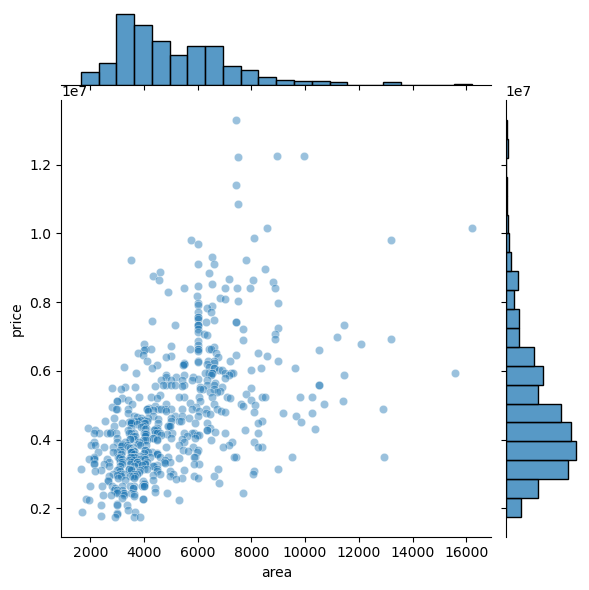

In [ ]:
sns.jointplot(x = "area", y= "price", data = housing, alpha = 0.45)

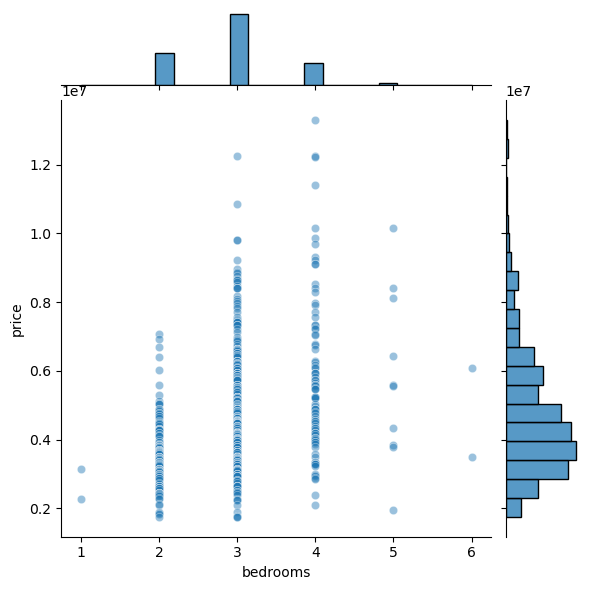

In [ ]:
sns.jointplot(x = "bedrooms", y= "price", data = housing, alpha = 0.45)

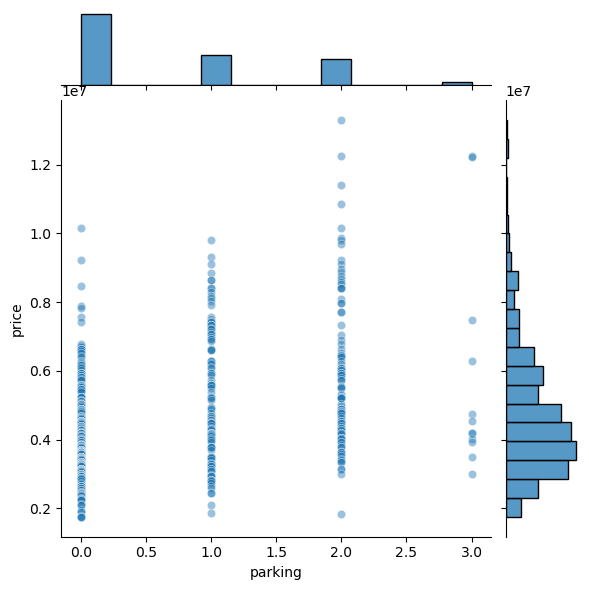

In [ ]:
sns.jointplot(x = "parking", y= "price", data = housing, alpha = 0.45)

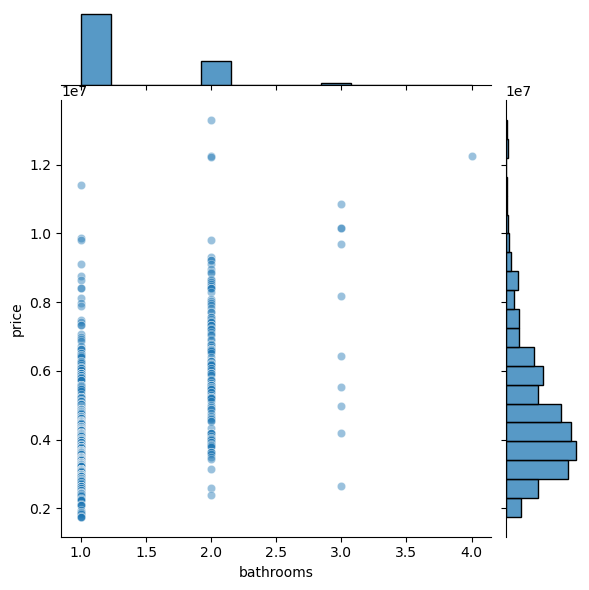

In [ ]:
sns.jointplot(x = "bathrooms", y= "price", data = housing, alpha = 0.45)

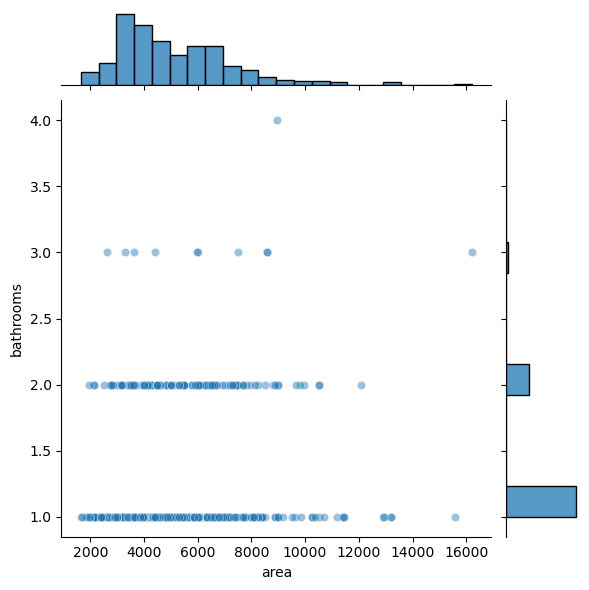

In [ ]:
sns.jointplot(x = "area", y= "bathrooms", data = housing, alpha = 0.45)

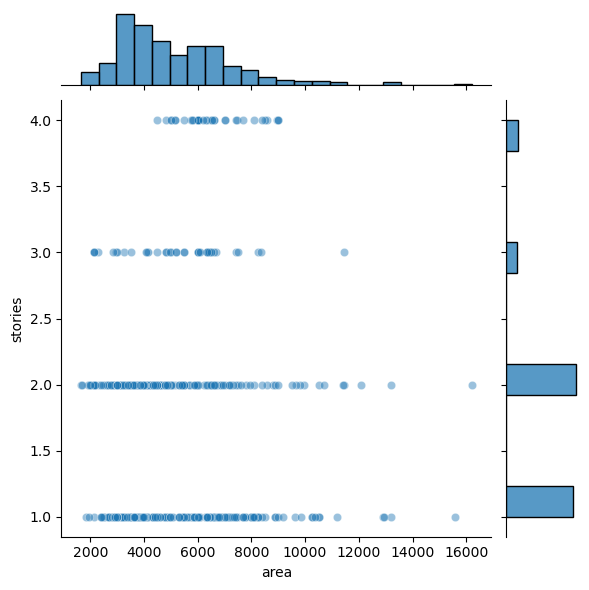

In [ ]:
sns.jointplot(x = "area", y= "stories", data = housing, alpha = 0.45)

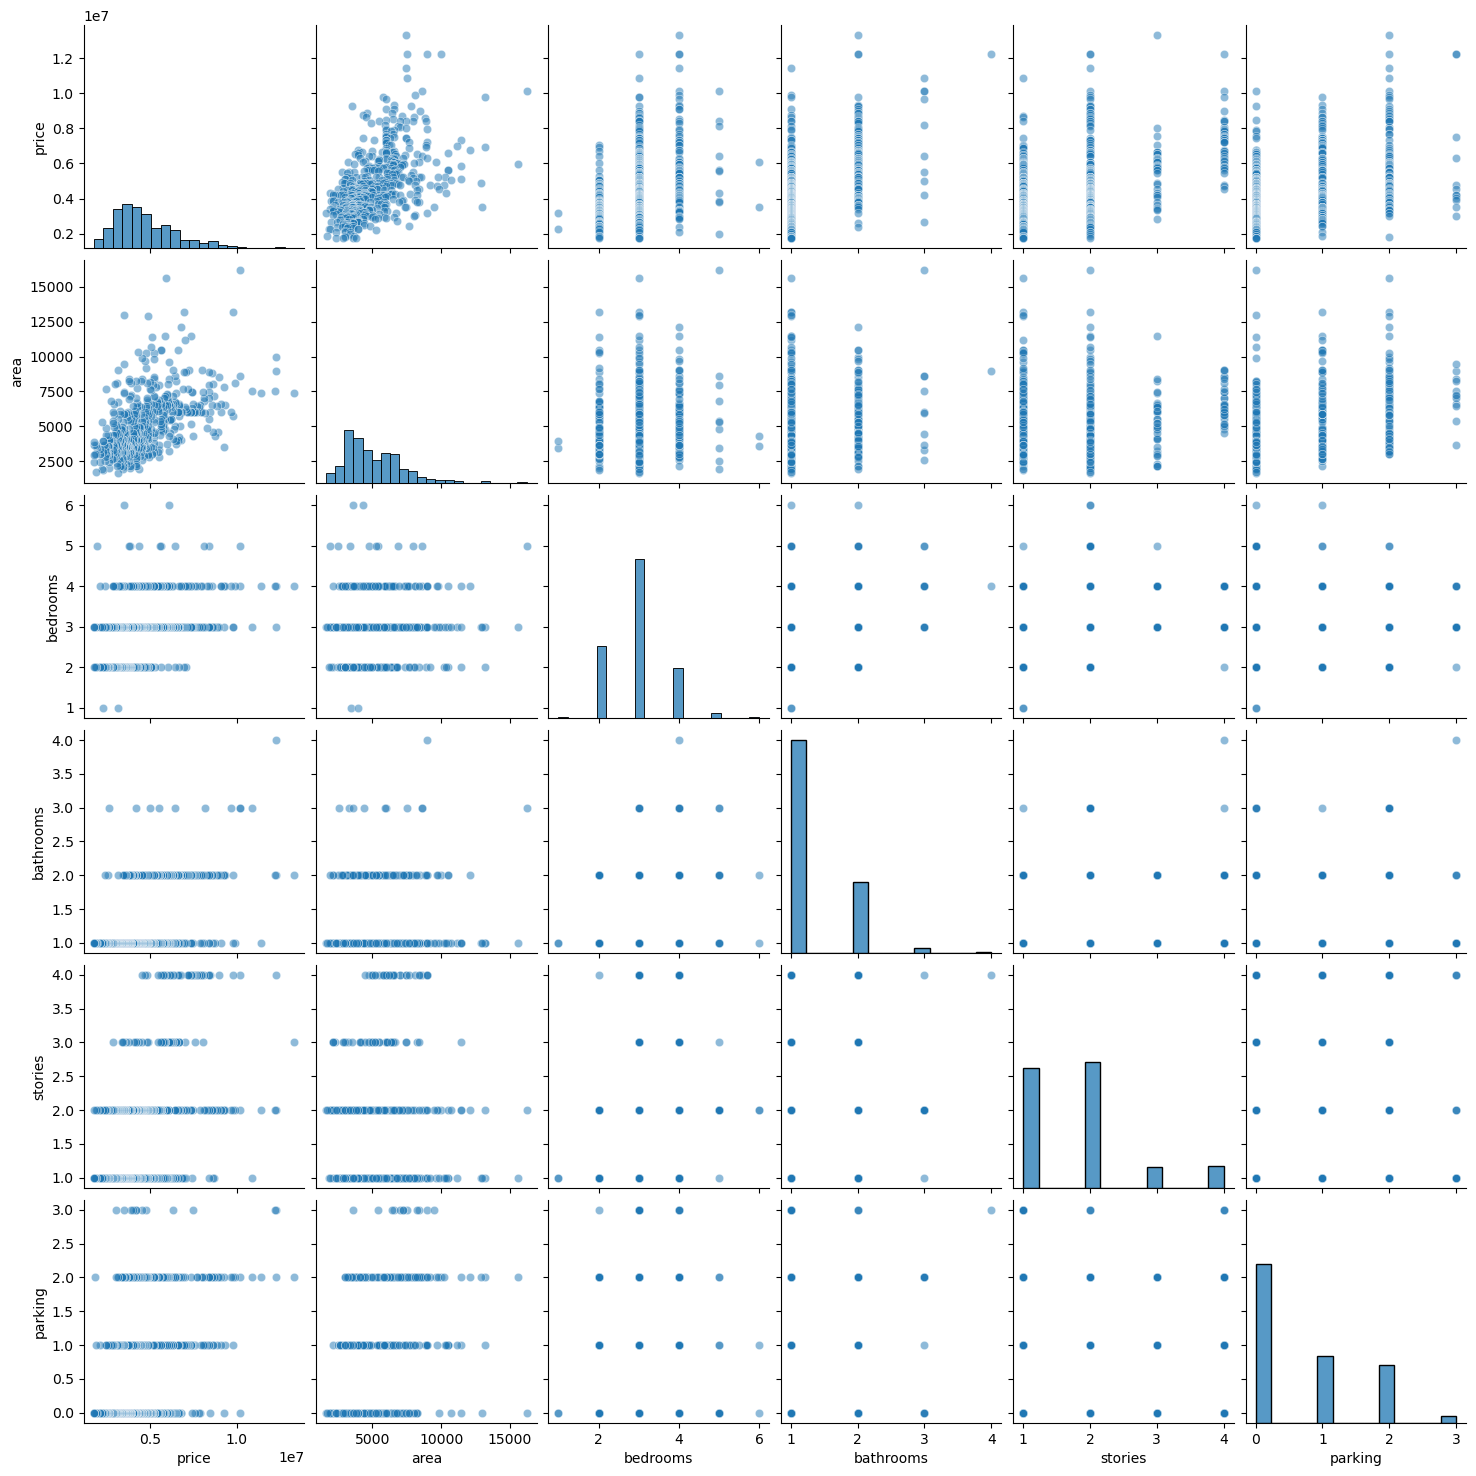

In [ ]:
sns.pairplot(housing, kind = 'scatter',plot_kws = {'alpha' : 0.5})
#this will give us a general idea of dependency

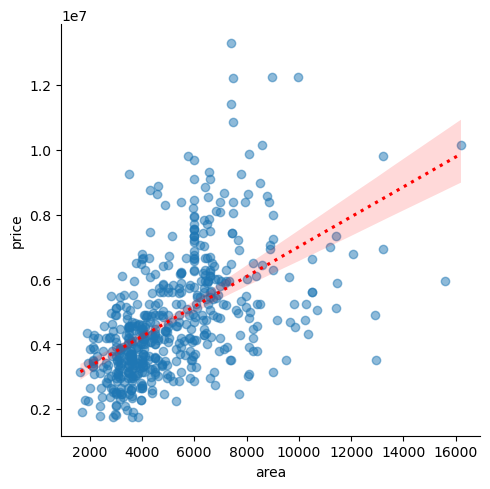

In [ ]:
sns.lmplot( x='area',
    y='price',
    data=housing,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'linestyle': 'dotted'})



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = housing[['area','parking','bathrooms','stories','bathrooms']]
y = housing['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
x_train

,area,parking,bathrooms,stories,bathrooms
175,9800,2,2,2,2
25,6540,2,2,2,2
253,3520,0,1,2,1
257,8250,0,1,1,1
431,3180,0,1,2,1
...,...,...,...,...,...
369,3600,0,1,1,1
320,4320,2,1,2,1
527,1836,0,1,1,1
125,15600,2,1,1,1


In [ ]:
x_test

,area,parking,bathrooms,stories,bathrooms
482,3150,0,1,2,1
314,4040,1,1,2,1
383,4500,2,2,2,2
487,5400,0,1,2,1
43,6000,2,2,4,2
...,...,...,...,...,...
26,6000,0,2,4,2
212,3420,2,2,2,2
282,2175,0,1,2,1
226,5170,0,1,4,1


In [ ]:
y_test

482    2940000
314    4095000
383    3570000
487    2870000
43     7700000
        ...   
26     8463000
212    4893000
282    4270000
226    4690000
99     6265000
Name: price, Length: 164, dtype: int64

In [ ]:
y_train

175    5250000
25     8540000
253    4515000
257    4480000
431    3290000
        ...   
369    3675000
320    4060000
527    2275000
125    5943000
265    4403000
Name: price, Length: 381, dtype: int64

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train , x_train_sm).fit()

In [ ]:
lr.params

const        119784.357496
area            364.844489
parking      396656.960793
bathrooms    578087.279159
stories      587963.796052
bathrooms    578087.279159
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           8.58e-61
Time:                        23:05:44   Log-Likelihood:                -5910.6
No. Observations:                 381   AIC:                         1.183e+04
Df Residuals:                     376   BIC:                         1.185e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.198e+05   2.51e+05      0.477      0.6

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([3.64844489e+02, 3.96656961e+05, 5.78087279e+05, 5.87963796e+05,
       5.78087279e+05])

In [ ]:
cdf = pd.DataFrame(lm.coef_, x.columns, columns=['Coef'])
print(cdf)

                    Coef
area          364.844489
parking    396656.960793
bathrooms  578087.279159
stories    587963.796052
bathrooms  578087.279159


In [ ]:
#predictions
predictions = lm.predict(x_test)

In [ ]:
predictions

array([ 3601146.6493278 ,  4322515.20563081,  6043175.18983616,
        4422046.75033536,  7766369.51594567,  6452824.5504769 ,
        4673225.27975752,  4161983.63032267,  5026282.59717042,
        3221144.21219748,  4449646.6086785 ,  3190132.43060386,
        3187048.15393065,  3998827.14270479,  5748763.31533232,
        3223769.12450721,  7612006.49398394,  5265401.68892328,
        5253509.71314281,  4805133.46413889,  3188308.20815718,
        2925620.17583476,  6355722.54381984,  5403492.10557336,
        4422046.75033536,  4353986.35158791,  4029051.91335766,
        4772297.46009859,  3323300.66921175,  3900319.13058389,
        3234477.93754442,  4702594.5342444 ,  6063860.63127277,
        5382151.92551102,  7244537.09233752,  5138179.16094121,
        4736850.22267085,  2849002.83307405,  4271896.34148716,
        5491695.84271759,  4290702.73417415,  5754127.78387593,
        3327513.28232528,  5428070.89980427,  5537524.24660528,
        7225758.61202393, 10674716.35180

Text(0.5, 1.0, 'Evaluation of our LM model')

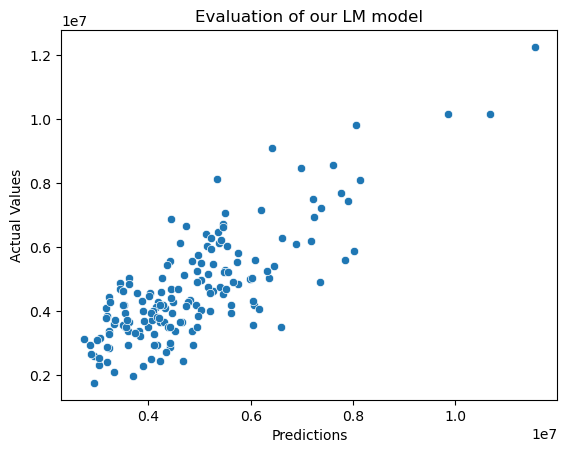

In [ ]:
sns.scatterplot(x=predictions,y= y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Evaluation of our LM model")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error: ", mean_squared_error(y_test,predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error:  820068.4707694724
Mean Squared Error:  1094310166636.058
RMSE:  1046092.8097621443


In [ ]:
residuals = y_test - predictions

In [ ]:
residuals

482   -6.611466e+05
314   -2.275152e+05
383   -2.473175e+06
487   -1.552047e+06
43    -6.636952e+04
           ...     
26     1.489944e+06
212   -7.561431e+05
282    1.024577e+06
226   -8.240601e+05
99     1.036083e+06
Name: price, Length: 164, dtype: float64

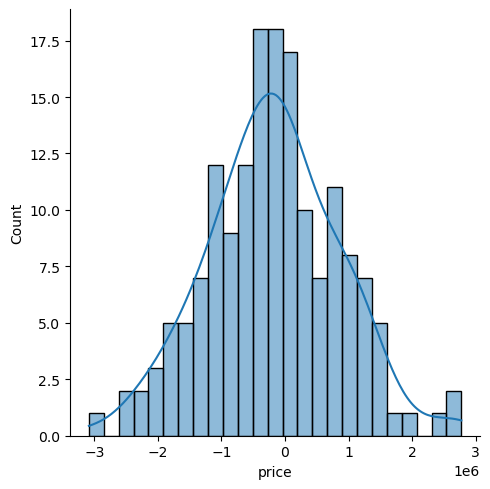

In [ ]:
sns.displot(residuals, bins = 25,kde = True)

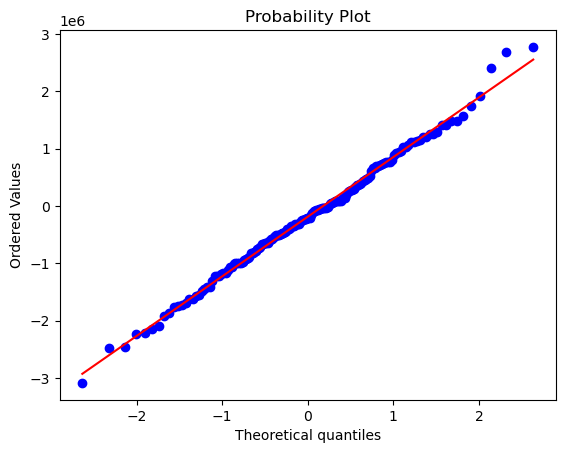

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist ="norm",plot = pylab)
pylab.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = housing.dropna()

In [ ]:
x = df.drop('area',axis =1)
y = df['price']

x = pd.get_dummies(x)

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.01834862385321101
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         2
     2100000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         1
     2275000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         2
     2520000       0.00      0.00      0.00         1
     2653000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         4
     2800000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         

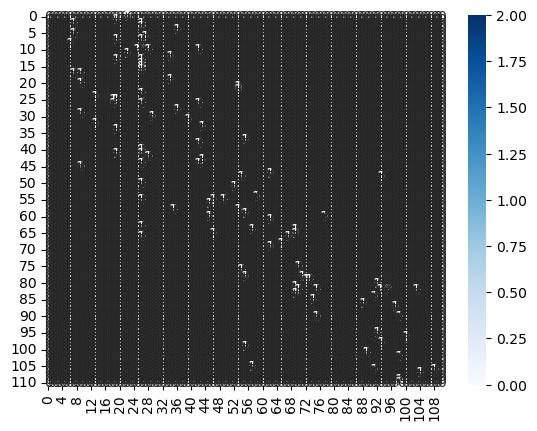

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='b', cmap='Blues')
plt.show()
plt.scatter